In [6]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import src.stlouisfed as fred
from src import utils, plotting, indicators

warnings.filterwarnings("ignore")
pd.set_option("display.float_format", "{:,.2f}".format)

In [2]:
# data_name = "GDP"
# data1 = fred.get_series_observation(data_name)
# data1.rename(columns={'lin': 'Close'}, inplace=True)
# data1.index = data1.index.tz_localize('UTC').tz_convert('America/New_York')
# data1 = data1[data1.index > '2012-01-01']

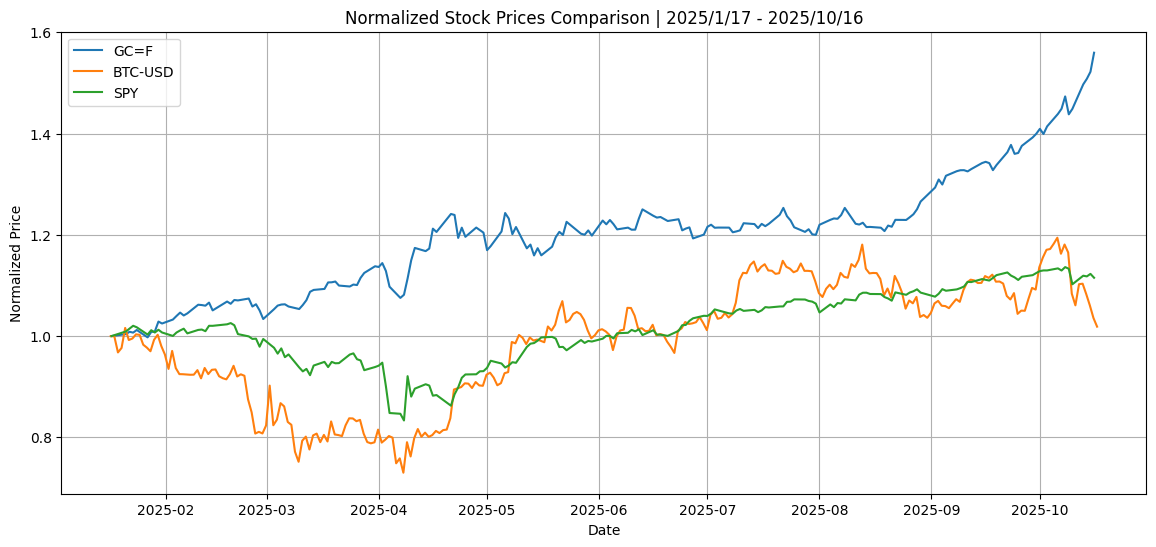

GC=F / BTC-USD correlation:0.63106935
GC=F / SPY correlation:   0.63071492
BTC-USD / SPY correlation:0.84426360


In [15]:
assets = plotting.compare_assets(
    [
        "GC=F",
        "BTC-USD",
        "SPY",
    ],
    start_date=[2025, 1, 17],
    end_date=[2025, 10, 17],
    log_scale=False,
)

,A,B
Date,,
2024-06-29 00:00:00-04:00,"62,678.29",NaN
2024-06-30 00:00:00-04:00,"62,851.98",NaN
2024-07-01 00:00:00-04:00,"62,029.02",538.63
2024-07-02 00:00:00-04:00,"60,173.92",542.26
2024-07-03 00:00:00-04:00,"56,977.70",544.68
...,...,...
2025-06-25 00:00:00-04:00,"106,960.00",607.12
2025-06-26 00:00:00-04:00,"107,088.43",611.87
2025-06-27 00:00:00-04:00,"107,327.70",614.91


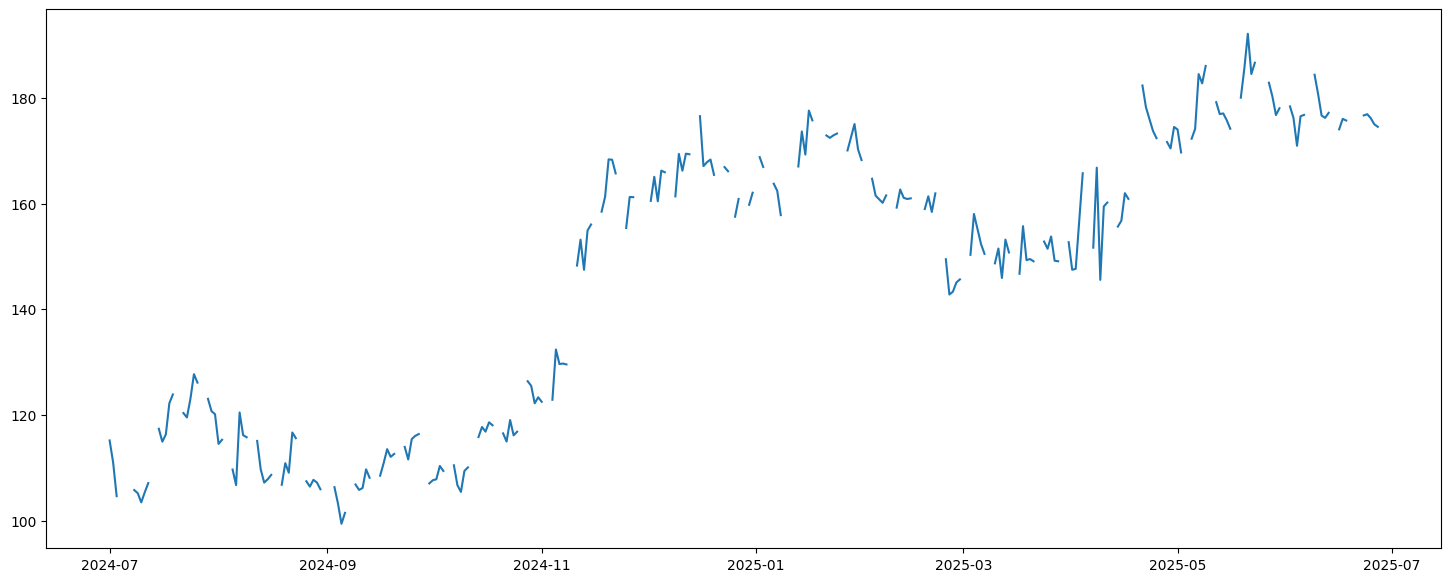

In [3]:
df = pd.DataFrame({"A": assets[0][1]["Close"], "B": assets[1][1]["Close"]})
plt.figure(figsize=(18, 7))
plt.plot(df.index, df["A"] / df["B"])
df

In [4]:
btc = assets[0][1]
mstr = assets[1][1]
z_score_val = indicators.z_score(btc, mstr)
data = pd.DataFrame()
data["BTC"] = btc["Close"]
data["MSTR"] = mstr["Close"]
data["Z_Score"] = z_score_val
data.dropna(inplace=True)
data

,BTC,MSTR,Z_Score
Date,,,
2024-08-05 00:00:00-04:00,"56,034.32",511.02,-1.64
2024-08-06 00:00:00-04:00,"55,027.46",515.73,-1.71
2024-08-07 00:00:00-04:00,"61,710.14",512.28,-0.12
2024-08-08 00:00:00-04:00,"60,880.11",524.12,-0.38
2024-08-09 00:00:00-04:00,"60,945.81",526.43,-0.40
...,...,...,...
2025-06-23 00:00:00-04:00,"106,045.63",600.15,0.03
2025-06-24 00:00:00-04:00,"107,361.26",606.78,0.52
2025-06-25 00:00:00-04:00,"106,960.00",607.12,0.35


In [5]:
from backtesting import Backtest
from src.strategies import PairsTradingZScore

print(data)

strategy = PairsTradingZScore
strategy.low_threshold = -2
strategy.high_threshold = 2
bt_pair_a = Backtest(data, strategy, cash=5_000, commission=0.004, trade_on_close=True)
stats = bt_pair_a.run()
stats

Loading BokehJS ...

ImportError: cannot import name 'PairsTradingZScore' from 'src.strategies' (/Users/ivankyulev/Projects/Notebooks/src/strategies/__init__.py)